In [25]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

Dimensions: 60000 x 784


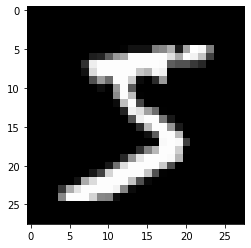

5


In [26]:
import numpy as np
import matplotlib.pyplot as plt


# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

#X contains image 
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])
first_image = np.array(X[0], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

#y contains labels
print(y[0])
torch.cuda.empty_cache()

In [27]:
x = X.reshape(60000, 784).astype(np.float32)/255
y = y.reshape(60000, 1).astype(np.int)
# converting training images into torch format
x  = torch.from_numpy(x)
y = torch.from_numpy(y)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()

In [28]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()
        self.linear_layers = Sequential(
            Linear(784, 500),
            ReLU(),
            Linear(500, 250),
            ReLU(),
            Linear(250, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.linear_layers(x)
        return x

In [29]:
# defining the model
model = Net()

# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.01)

# defining the loss function
criterion = CrossEntropyLoss()

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

print(model)

Net(
  (linear_layers): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=10, bias=True)
  )
)


In [30]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(x), Variable(y)

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    
    # Set the y dimensions correctly
    y_train = y_train.squeeze(1).long()
    
    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    
    if epoch%100 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_train)

In [ ]:
# defining the number of epochs
n_epochs = 1000

# empty list to store training losses
train_losses = []

# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.3065, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  101 	 loss : tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  201 	 loss : tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
X_test, y_test = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')
print(X_test.shape)

In [ ]:
X_test = X_test.reshape(10000, 784).astype(np.float32)/255
y_test = y_test.reshape(10000, 1).astype(np.int)
test_x  = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)
if torch.cuda.is_available():
    test_x = test_x.cuda()
output = model(test_x)
_,predictions = torch.max(output, axis=1)
accuracy_score(test_y, predictions.cpu())

In [ ]:
del criterion, model, optimizer, x, y, test_x

In [ ]:
%reset -f